<a href="https://colab.research.google.com/github/FreddyR424/Deep_Learning/blob/master/Audio_MNIST_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **Audio MNIST Digit Recognition**

## **Context**
- Audio in its raw form is usually a wave and to capture that using a data structure, we need to have a huge array of amplitudes even for a very short audio clip. Although it depends on the sampling rate of the sound wave, this structured data conversion for any audio wave is very voluminous even for low sampling rates. So it becomes a problem to store and computationally very expensive to do even simple calculations on such data.
- One of the best economical alternatives to this is using spectrograms. Spectrograms are created by doing Fourier or Short Time Fourier Transforms on sound waves. There are various kinds of spectrograms, but the ones we will be using are called MFCC spectrograms. To put it in simple terms, a spectrogram is a way to visually encapsulate audio data. It is a graph on a 2-D plane where the X-axis represents time and the Y-axis represents Mel Coefficients. But since it is continuous on a 2-D plane, we can treat this as an image.

## **Objective**
- The objective here is to build an Artificial Neural Network that can look at Mel or MFCC spectrograms of audio files and classify them into the 10 classes that represent the 10 unique digits in the spoken Engilsh language. The audio files are recordings of different speakers uttering a particular digit and the corresponding class to be predicted is the digit itself.



## **Dataset**
- The dataset we will use is the Audio MNIST dataset, which has audio files (having .wav extension) stored in 10 different folders. Each folder consists of these digits spoken by a particular speaker.

In [1]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Imports**

In [3]:
# For Audio Preprocessing
import librosa
import librosa.display as dsp
from IPython.display import Audio

# For Data Preprocessing
import pandas as pd
import numpy as np
import os

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
sns.set_style("dark")

#The data is provided as a zip file
import zipfile
import os

## **Mounting Drive / Unzipping Data File**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = '/content/drive/MyDrive/Audio_MNIST_Archive.zip'
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

## **Reading and checking some of the audio samples**
- The below function called "get_audio" takes a digit as an argument and plots the audio wave and returns the audio for a given digit.

In [6]:
def get_audio(digit = 0):
  # audio sample directory
  sample = np.random.randint(1, 10)
  # index of audio
  index = np.random.randint(1, 5)
  # modified file location
  if sample < 10:
    file = f"/content/data/0{sample}/{digit}_0{sample}_{index}.wav"

  else:
    file = f"/content/data/{sample}/{digit}_{sample}_{index}.wav"

  # Get Audio from the location
  data, sample_rate = librosa.load(file)

  # plot the audio wave
  dsp.waveshow(data, sr = sample_rate)
  plt.show()

  # show widget
  return Audio(data = data, rate = sample_rate)

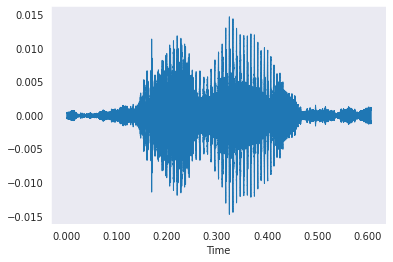

In [7]:
get_audio(0)

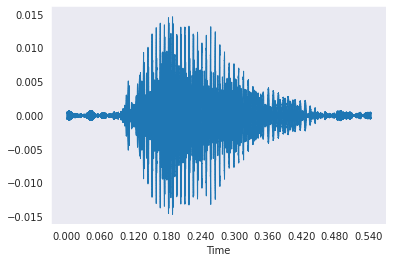

In [8]:
get_audio(1)

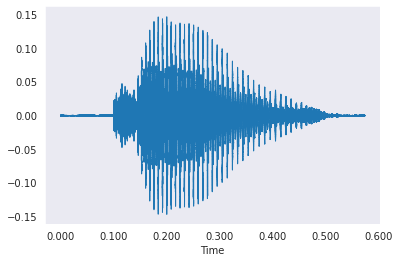

In [9]:
get_audio(2)

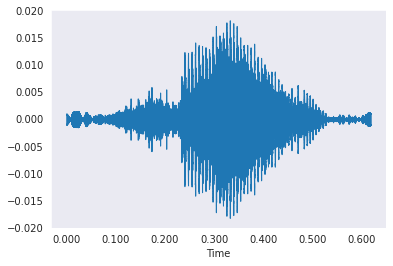

In [10]:
get_audio(3)

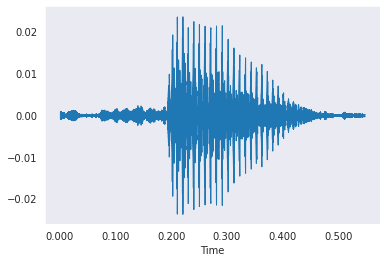

In [11]:
get_audio(4)

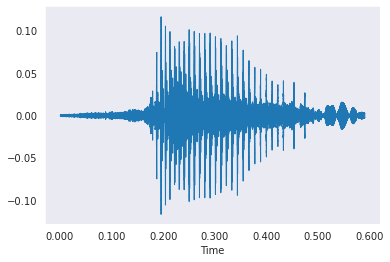

In [12]:
get_audio(5)

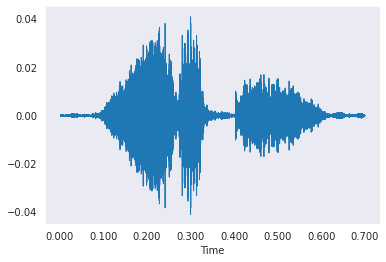

In [13]:
get_audio(6)

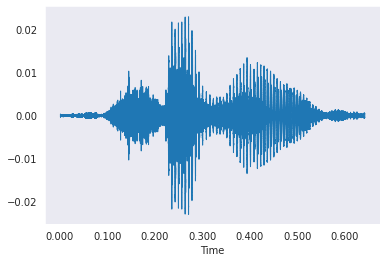

In [14]:
get_audio(7)

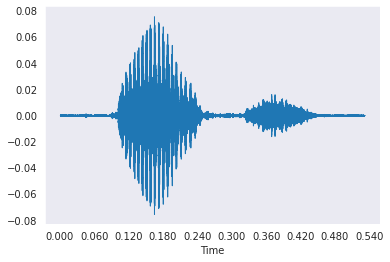

In [15]:
get_audio(8)

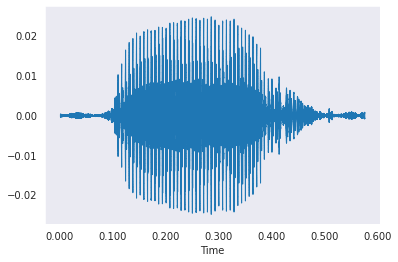

In [16]:
get_audio(9)

- The X-axis represents time and Y-axis represents the amplitude of the vibrations.
- The intuition behind the Fourier Transform is that any wave can be broken down or deconstructed as a sum of many composite sine waves. Since these are composed of sine waves, they are symmetric about the time axis, i.e, they extend equally above and below the time axis at a particular time.
- From the various audio plots ranging from 0 to 9, we can observe the amplitude at a given point in time. For example, when we say "Zero", the "Z" sound has low amplitude and the "ero" sound has higher amplitude. Similarly, the remaining digits can be interpreted by looking at the visualizations.

## **Visualizing the spectrogram of the audio data**
- A spectrogram is a visual way of representing the signal strength or “loudness” of a signal over time at various frequencies or time steps present in a particular waveform. A spectrogram gives a detailed view of our audio. It represents amplitude, frequency, and time in a single plot.

In [17]:
# A function which returns audio file for a mentioned digit

def get_audio_raw(digit = 0):
  # audio sample directory
  sample = np.random.randint(1, 10)
  # index of audio
  index = np.random.randint(1, 5)

  # modified file location
  if sample < 10:
    file = f"/content/data/0{sample}/{digit}_0{sample}_{index}.wav"

  else:
    file = f"/content/data/{sample}/{digit}_{sample}_{index}.wav"

  # get audio from location
  data, sample_rate = librosa.load(file)

  # return audio
  return data, sample_rate


## **Extracting features from the audio file**
- Mel-frequency cepstral coefficients (MFCCs) Feature Extraction
- MFCCs are usually the final features used in many machine learning models trained on audio data. They are usually a set of mel coefficients defined for each time step through which the raw audio data can be encoded.

In [18]:
# Creating a function that extracts the data from audio files
# Will take an audio file as input and return extracted features using MEL_FREQUENCY CEPSTRAL COEFFICIENT as the output

def extract_features(file):
  # load audio and sample rate
  audio, sample_rate = librosa.load(file)

  # extract features using mel-frequency coefficient
  extracted_features = librosa.feature.mfcc(y = audio,
                                            sr = sample_rate,
                                            n_mfcc = 40)
  
  # scale extracted features
  extracted_features = np.mean(extracted_features.T, axis = 0)
  # return extracted features
  return extracted_features

def preprocess_and_create_dataset():
    # Path of the folder where the audio files are present
    root_folder_path = "/content/data/"

    # Empty List to create dataset
    dataset = []
        
    # Iterating through folders where each folder has the audio of each digit
    for folder in tqdm(range(1, 11)):

        if folder < 10:

            # Path of the folder
            folder = os.path.join(root_folder_path, "0" + str(folder))

        else:
            folder = os.path.join(root_folder_path, str(folder))
            
        # Iterate through each file of the present folder
        for file in tqdm(os.listdir(folder)):

            # Path of the file
            abs_file_path = os.path.join(folder, file)

            # Pass path of file to the extracted_features() function to create features
            extracted_features = extract_features(abs_file_path) 

            # Class of the audio, i.e., the digit it represents
            class_label = file[0]
            
            # Append a list where the feature represents a column and class of the digit represents another column
            dataset.append([extracted_features, class_label])
    
    # After iterating through all the folders, convert the list to a DataFrame
    return pd.DataFrame(dataset, columns = ['features', 'class'])

In [19]:
# Create the dataset by calling the function
dataset = preprocess_and_create_dataset()

100%|██████████| 10/10 [07:53<00:00, 47.32s/it]


In [20]:
# view dataset head
dataset.head()

,features,class
0,"[-613.02106, 126.3215, -4.8400583, 36.39304, 2...",9
1,"[-642.85077, 81.591866, 10.150862, 27.587534, ...",7
2,"[-607.10443, 86.566956, 17.177834, 27.190203, ...",7
3,"[-620.9715, 108.45634, 9.158638, 16.58923, 4.2...",4
4,"[-562.1765, 82.98177, 7.288635, 29.54532, 12.7...",7


In [21]:
# Storing the class as int
dataset['class'] = [int(x) for x in dataset['class']]

In [22]:
# checking frequency of classes in dataset
dataset['class'].value_counts()

9    500
7    500
4    500
2    500
8    500
0    500
5    500
3    500
6    500
1    500
Name: class, dtype: int64

## **Visualizing the Mel Frequency Cepstral Coefficients Using a Spectrogram**
- From the Mel Coefficients we are extracting for a particular audio, this function is creating the 2-D graph of those coefficients with the X-axis representing time and the Y-axis shows the corresponding Mel coefficients in that time step.

In [23]:
# A function which returns MFCC

def draw_spectrograms(audio_data, sample_rate):
  # extract features
  extracted_features = librosa.feature.mfcc(y = audio_data,
                                            sr = sample_rate,
                                            n_mfcc = 40)
  
  # return features w/o scaling
  return extracted_features

Shape of MFCC of audio digit 0 --->  (40, 26)
Shape of MFCC of audio digit 1 --->  (40, 30)
Shape of MFCC of audio digit 2 --->  (40, 20)
Shape of MFCC of audio digit 3 --->  (40, 26)
Shape of MFCC of audio digit 4 --->  (40, 28)
Shape of MFCC of audio digit 5 --->  (40, 26)
Shape of MFCC of audio digit 6 --->  (40, 33)
Shape of MFCC of audio digit 7 --->  (40, 34)
Shape of MFCC of audio digit 8 --->  (40, 23)
Shape of MFCC of audio digit 9 --->  (40, 32)


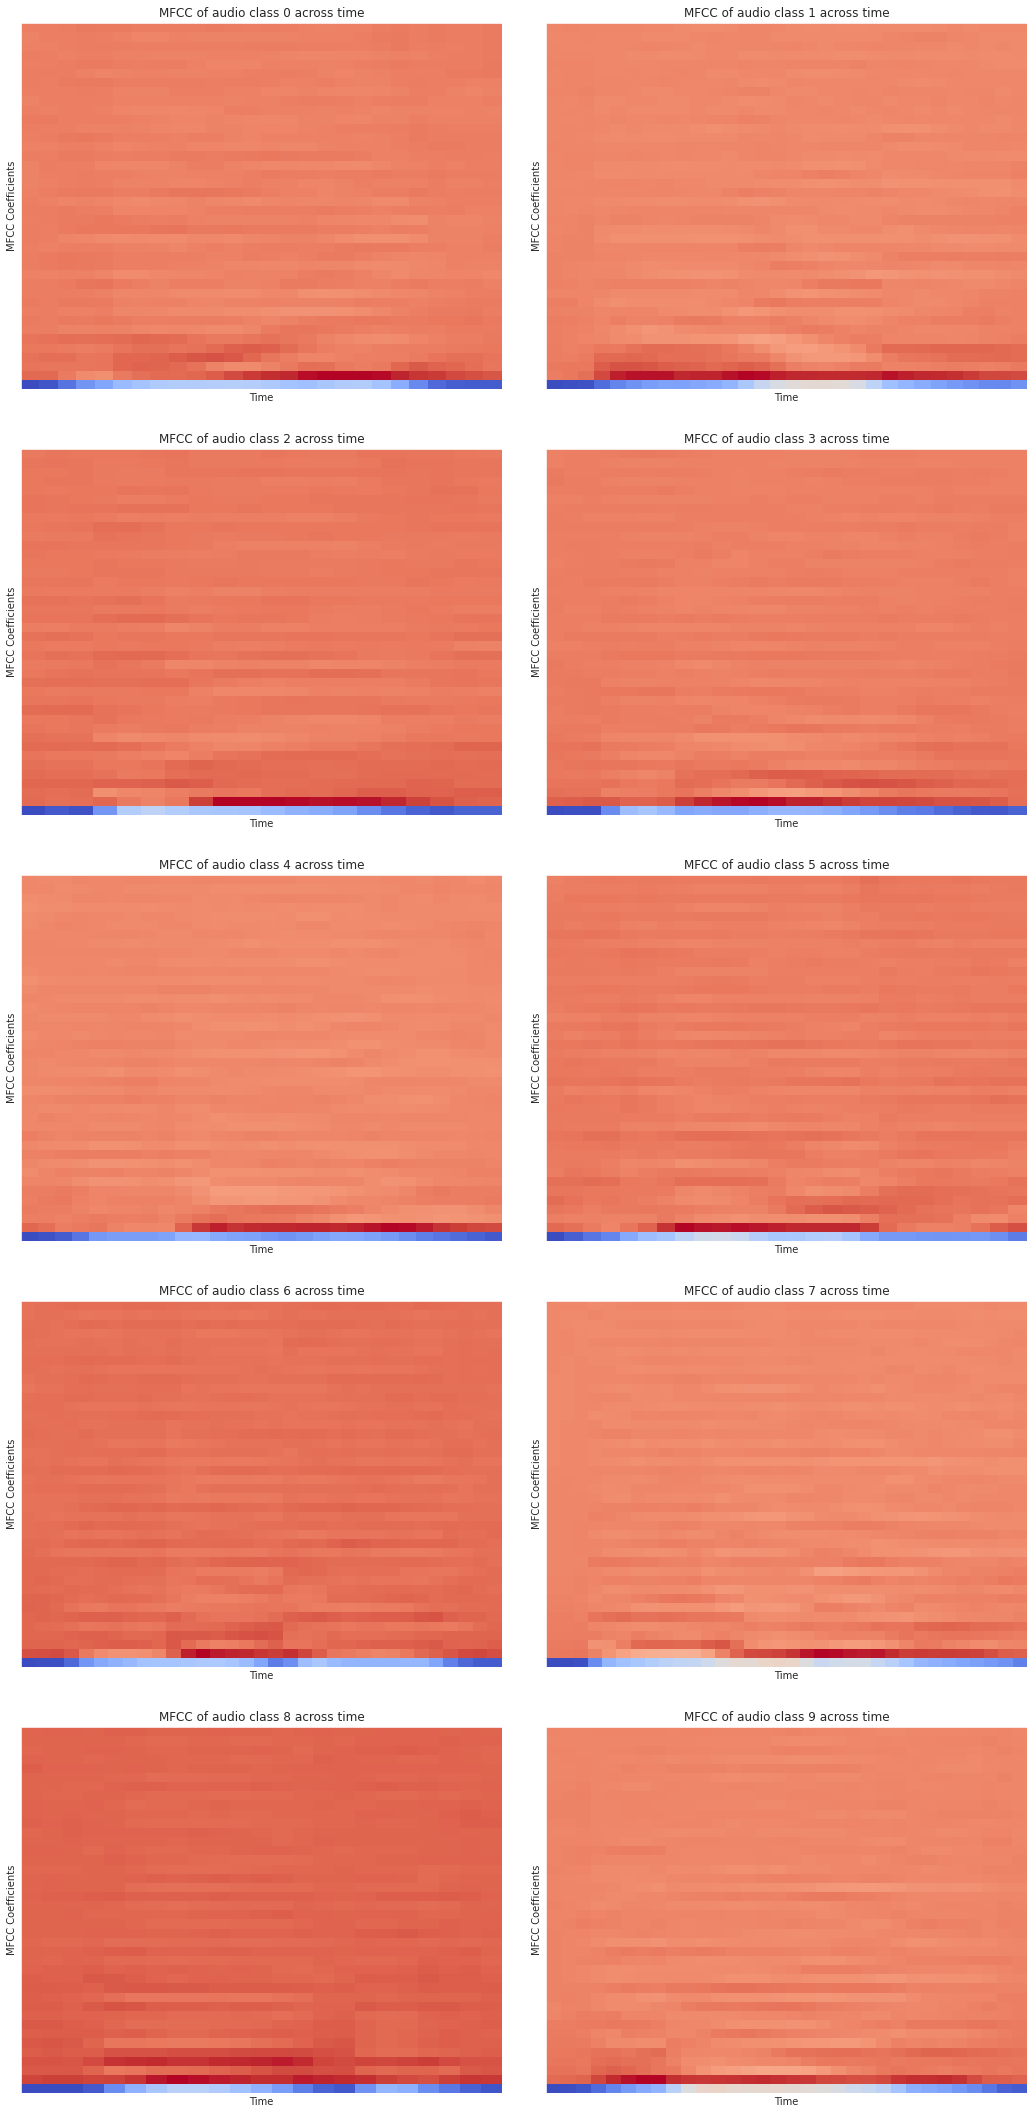

In [24]:
# Creating subplots
fig, ax = plt.subplots(5, 2, figsize = (15, 30))

# Initializing row and column variables for subplots
row = 0
column = 0

for digit in range(10):
    # Get the audio of different classes (0-9)
    audio_data, sample_rate = get_audio_raw(digit)
    
    # Extract their MFCC
    mfcc = draw_spectrograms(audio_data, sample_rate)
    print(f"Shape of MFCC of audio digit {digit} ---> ", mfcc.shape)
    
    # Display the plots and its title
    ax[row,column].set_title(f"MFCC of audio class {digit} across time")
    librosa.display.specshow(mfcc, sr = 22050, ax = ax[row, column])
    
    # Set X-labels and Y-labels
    ax[row,column].set_xlabel("Time")
    ax[row,column].set_ylabel("MFCC Coefficients")
    
    # Conditions for positioning of the plots
    if column == 1:
        column = 0
        row += 1
    else:
        column+=1
        
    
plt.tight_layout(pad = 3)   
plt.show()

### **Visual Inspection of MFCC Spectrograms:**
- On inspecting them visually, we can see that there are a lot of deviations from the spectrograms of one audio to another. There are a lot of tiny rectangles and bars whose positions are unique to each audio. So, the Artificial Neural Network should be able to perform decently well in identifying these audios.

## **Perform the Train-Test-Split**
- Split the data into train and test sets

In [25]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X = np.array(dataset['features'].to_list())
Y = np.array(dataset['class'].to_list())

# Create train set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75, shuffle = True, random_state = 8)

In [26]:
X_train.shape

(3750, 40)

## **Modeling**
- Create an artificial neural network to recognize the digit.

In [27]:
# To create an ANN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# To create a checkpoint and save the best model
from tensorflow.keras.callbacks import ModelCheckpoint
# To load the model
from tensorflow.keras.models import load_model
# To evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer

## **Model Creation**
- When we convert audios to their corresponding spectrograms, we will have similar spectrograms for similar audios irrespective of who the speaker is, and what their pitch and timber is like. So local spatiality is not going to be a problem, meaning convolutional layers or other such feature extraction layers would be unnecessary on top of our fully connected layers, as they would just be adding to our computational redundancy. That means, a simple Artificial Neural Network (Feedforward Neural Network) should be enough for this use case.
- We will use a Sequential model with multiple connected hidden layers, and an output layer that returns a single, continuous value.

In [28]:
# Crete a Sequential Object
model = Sequential()

# Add first layer with 100 neurons to the sequental object
model.add(Dense(100, input_shape = (40, ), activation = 'relu'))

# Add second layer with 100 neurons to the sequental object
model.add(Dense(100, activation = 'relu'))

# Add third layer with 100 neurons to the sequental object
model.add(Dense(100, activation = 'relu'))

# Output layer with 10 neurons as it has 10 classes
model.add(Dense(10, activation = 'softmax'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 25,310
Trainable params: 25,310
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Compile the model
model.compile(loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer = 'adam')

## **Model Checkpoint & Training**

In [31]:
# Set the number of epochs for training
num_epochs = 100
# Set the batch size for training
batch_size = 32
# Fit the model
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = num_epochs, batch_size = batch_size, verbose = 1)

Epoch 1/100
118/118 [==============================] - 2s 6ms/step - loss: 4.3349 - accuracy: 0.4035 - val_loss: 1.0321 - val_accuracy: 0.7088
Epoch 2/100
118/118 [==============================] - 0s 3ms/step - loss: 0.5823 - accuracy: 0.7880 - val_loss: 0.4194 - val_accuracy: 0.8472
Epoch 3/100
118/118 [==============================] - 1s 6ms/step - loss: 0.3432 - accuracy: 0.8816 - val_loss: 0.5311 - val_accuracy: 0.8208
Epoch 4/100
118/118 [==============================] - 1s 6ms/step - loss: 0.2666 - accuracy: 0.9136 - val_loss: 0.3834 - val_accuracy: 0.8488
Epoch 5/100
118/118 [==============================] - 1s 6ms/step - loss: 0.2258 - accuracy: 0.9219 - val_loss: 0.2094 - val_accuracy: 0.9264
Epoch 6/100
118/118 [==============================] - 1s 6ms/step - loss: 0.1697 - accuracy: 0.9427 - val_loss: 0.2348 - val_accuracy: 0.9088
Epoch 7/100
118/118 [==============================] - 1s 6ms/step - loss: 0.1345 - accuracy: 0.9565 - val_loss: 0.1245 - val_accuracy: 0.9624

## **Model Evaluation**

In [32]:
# Make predictions on the test set
Y_pred = model.predict(X_test)
Y_pred = [np.argmax(i) for i in Y_pred]

40/40 [==============================] - 0s 3ms/step


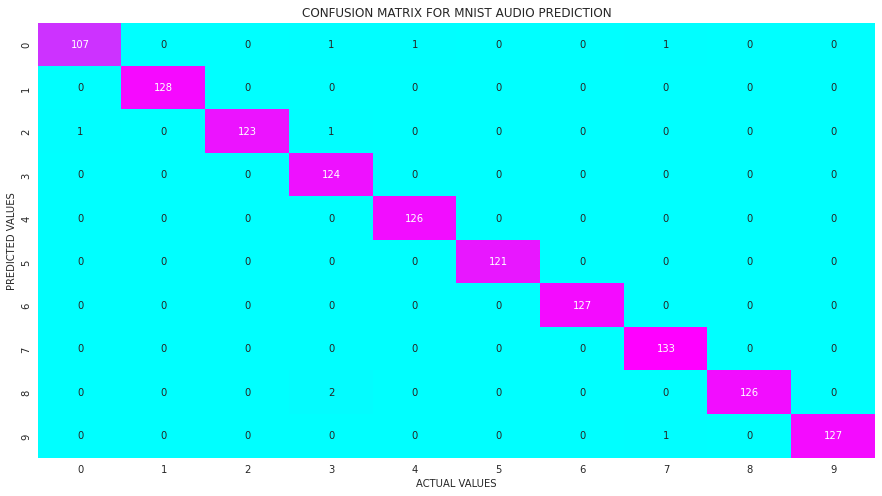

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       110
           1       1.00      1.00      1.00       128
           2       1.00      0.98      0.99       125
           3       0.97      1.00      0.98       124
           4       0.99      1.00      1.00       126
           5       1.00      1.00      1.00       121
           6       1.00      1.00      1.00       127
           7       0.99      1.00      0.99       133
           8       1.00      0.98      0.99       128
           9       1.00      0.99      1.00       128

    accuracy                           0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250



In [33]:
# Set style as dark
sns.set_style("dark")

# Set figure size
plt.figure(figsize = (15, 8))

# Plot the title
plt.title("CONFUSION MATRIX FOR MNIST AUDIO PREDICTION")

# Confusion matrix
cm = confusion_matrix([int(x) for x in Y_test], Y_pred)

# Plot the confusion matrix as heatmap
sns.heatmap(cm, annot = True, cmap = "cool", fmt = 'g', cbar = False)

# Set X-label and Y-label
plt.xlabel("ACTUAL VALUES")
plt.ylabel("PREDICTED VALUES")

# Show the plot
plt.show()

# Print the metrics
print(classification_report(Y_test, Y_pred))

- From the confusion matrix, we can observe that most of the observations are correctly identified by the model.
- In very few cases, the model is not able to identify the correct digit. For example, 9 observations are 0 but the model has predicted them as 2.
- The model has given a great performance with 99% recall, precision and F1-score.